Streaming output truncated to the last 5000 lines.
Cumulative reward for episode 1533: 11
34
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
20
Cumulative reward for episode 1534: -52
92
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
20
Cumulative reward for episode 1535: -6
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
20
Cumulative reward for episode 1536: -26
191
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
20
Cumulative reward for episode 1537: -49
21
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
20
Cumulative reward for episode 1538: -5
314
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
20
Cumulative reward for episode 1539: -28
364
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | :

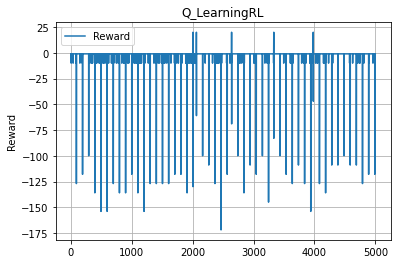

In [2]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

# CREATE THE ENVIRONMENT
env = gym.make("Taxi-v3")
action_size = env.action_space.n
state_size = env.observation_space.n
print("Action space size: ", action_size)
print("State space size: ", state_size)
env.render()

# INITIALISE Q TABLE TO ZERO
Q = np.zeros((state_size, action_size))

# HYPERPARAMETERS
train_episodes = 2000 # Total train episodes
test_episodes = 100  # Total test episodes
max_steps = 100 # Max steps per episode
alpha = 0.1  # Learning rate
gamma = 0.618  # Discounting rate

# EXPLORATION / EXPLOITATION PARAMETERS
epsilon = 1  # Exploration rate
max_epsilon = 1  # Exploration probability at start
min_epsilon = 0.01  # Minimum exploration probability
decay_rate = 0.01  # Exponential decay rate for exploration prob

# TRAINING PHASE
training_rewards = []  # list of rewards
train=[]
for episode in range(train_episodes):

    state = env.reset()  # Reset the environment
    print(state)
    train.append(episode)
    cumulative_training_rewards = 0

    for step in range(max_steps):
        # Choose an action (a) among the possible states (s)
        exp_exp_tradeoff = random.uniform(0, 1)  # choose a random number

        # If this number > epsilon, select the action corresponding to the biggest Q value for this state (Exploitation)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state, :])
            # Else choose a random action (Exploration)
        else:
            action = env.action_space.sample()

        # Perform the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)
        training_rewards.append(reward)
        train.append(step)
        # Update the Q table using the Bellman equation: Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
        cumulative_training_rewards += reward  # increment the cumulative reward
        state = new_state  # Update the state

        # If we reach the end of the episode
        if done == True:
            env.render()
            print(reward)
            print("Cumulative reward for episode {}: {}".format(episode, cumulative_training_rewards))
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

    # append the episode cumulative reward to the list
    training_rewards.append(cumulative_training_rewards)
training_rewards1=[]
train1=[]
print("Training score over time: " + str(sum(training_rewards) / train_episodes))
for i in training_rewards:
        training_rewards1.append(i)


print(train)
print(training_rewards)
plt.plot(training_rewards1[25000:30000], label='Reward')
plt.ylabel('Reward')
plt.title('Q_LearningRL')
plt.grid(True)
plt.legend()
plt.show()